# Extremely simple Q-learning demo (reinforcement learning)

I was reading through David Silver's notes from his course at the University College London [1], and decided to experiment with the simplest system I could think of for RL. The system is just a straight line in 1-dimension with a terminal state at both ends. The left terminal state is bad, in a game-over sense. The terminal state on the right is good, and carries a reward. There is no reward associated with the intermediate steps, but you're allowed a maximum of 12 moves in any "episode" of play.

The code below should be very self-explanatory.


### References:
[1] http://www0.cs.ucl.ac.uk/staff/d.silver/web/Teaching.html

In [1]:
import numpy as np
import seaborn as sns; sns.set()
import pandas as pd
import matplotlib 
%matplotlib inline
import matplotlib.animation as animation
from matplotlib import gridspec

In [2]:
# steps: the reward function for the problem
# agent gets a reward at step #9, and is penalised at step #0.
# there is no direct reward for the intermediate steps!
def steps(x):
    if x == 9: return 1
    if x == 0: return -1
    return 0

In [3]:
nstates = 10 # number of states (steps)
actions = [-1, 1]
nactions = 2 # move left or right
lr = 0.1 # learning rate
gamma = 0.9 # greedy(=0) vs. future-looking(=1)

# Initialise the Q-table randomly.
# Since there will be no way to update the Q-value of 
# the terminal-states when running, set them to zero now.
Q = np.random.rand(nstates, nactions)
Q[9, :] = 0
Q[0, :] = 0

# We can look at the initial Q-matrix..
print Q

[[ 0.          0.        ]
 [ 0.96928601  0.05564877]
 [ 0.24751885  0.07218827]
 [ 0.45304732  0.35176617]
 [ 0.44692536  0.47519625]
 [ 0.11878187  0.44914307]
 [ 0.81261386  0.73105563]
 [ 0.33232509  0.12268154]
 [ 0.49384103  0.40966538]
 [ 0.          0.        ]]


In [4]:
# Next we generate a bunch of episodes, which are simply sampled randomly
savedQ = [] # stores history of the Q-table
for episode in range(500):
    state = np.random.choice( range(1, 9) )#2. # inital step
    nmoves = 0
    savedQ.append( np.round(Q, 2) )

    for i in range(12): # max_moves = 12
        nmoves += 1
        # pick a random action (0=move left, 1=move right)
        a = np.random.choice( [0, 1] )
        newstate = state + actions[a]
        
        # first get the immediate reward from 'a'
        reward = steps(newstate) - steps(state)
        # update Q
        # max_nextstep i.e. max_a'(Q[s', a'])
        # find what we think is the best action in newstate
        max_nextstep = np.max(Q[newstate, :])
        update = reward + gamma * max_nextstep - Q[state, a]
        Q[state, a] = Q[state, a] + lr * update

        state = newstate
        if state == 0:
            # game over
            break

        if state == 9:
            # we won (end of game)
            break

### Change in Q-matrix over time

Now we calculate the delta of each saved Q-matrix between subsequent episodes, and plot this change. It appears that the Q-matrix basically stops changing after about 350 training episodes.

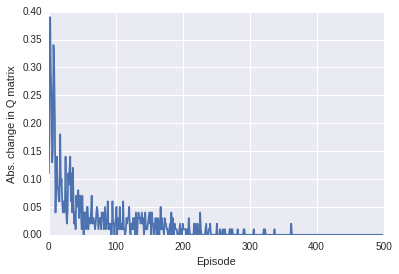

In [5]:
savedQ = np.array(savedQ)
deltaQ = np.diff(savedQ, axis=0) # 0 as diff Q between episodes
deltaQ = np.abs(deltaQ) # just absolute change between episodes
deltaQ = np.sum(deltaQ, axis=1)
deltaQ = np.sum(deltaQ, axis=1) # was axis 2, but becomes axis 1

sns.plt.plot(np.arange(deltaQ.shape[0]), deltaQ)
sns.plt.xlabel('Episode')
sns.plt.ylabel('Abs. change in Q matrix')
sns.plt.savefig('deltaQ.png')

### Time-evolution of Q-matrix during training

We can actually view how the Q-matrix converges over training episodes (video below). The final Q-matrix is as-expected: the values right column are always greater than the ones is the left column, indicating that moving right is always better. The reward associated with moving left when in state-1 is $-1$ (penalise), while the reward from moving left from state-8 is $1$ (i.e. the reward of the final state that we specified originally). The rest of the Q-values are learned during training, and can be interpreted as *"the maximum discounted-reward that can be achieved if, in my current state I choose this action"*. The discount factor (gamma in the Python code above) was chosen to be $0.9$, so the maximum discounted-reward from (say) moving right in state-6 is $0.81$, which can be computed using $q = r\times \gamma^{h}$, for reward $r$ and $h$ the number of hops until the reward is realised.

In [10]:
%%HTML
<video width="800" height="550" controls>
  <source src="Q_matrix_training.mp4" type="video/mp4">
</video>

In [9]:
# Clone repo to see video inline, or view file Q_matrix_training.mp4